In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
y = df['target']

In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
x = df.drop('target',axis=1)

In [7]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [9]:
print(x_train.shape)

(212, 13)


In [10]:
print(y_train.shape)

(212,)


In [11]:
print(x_test.shape)

(91, 13)


In [12]:
print(y_test.shape)

(91,)


##Logistic Regression - GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(penalty='l2')

val = list(np.arange(1, 100, 1))

parameters = {'solver':('newton-cg', 'liblinear', 'sag', 'saga'), 'C':val}

clf_lr = GridSearchCV(lr_model, parameters)
clf_lr.fit(x_train, y_train)

In [14]:
print(clf_lr.best_params_)

{'C': 1, 'solver': 'liblinear'}


In [15]:
test_pred = clf_lr.predict(x_test)

In [16]:
acc_lr_gs = accuracy_score(test_pred,y_test)
acc_lr_gs

0.8681318681318682

Thus we get an accuracy rate of 86.8%.

##KNeighborsClassifier - GridSearchCV

In [17]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

val = list(np.arange(1,10, 1))

parameters = {'n_neighbors':val}

clf_knn = GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [18]:
print(clf_knn.best_params_)

{'n_neighbors': 9}


In [19]:
test_pred_knn = clf_knn.predict(x_test)

In [20]:
accuracy_knn_gs = accuracy_score(test_pred_knn, y_test)
accuracy_knn_gs

0.7032967032967034

Thus we got an accuracy rate of 70.3%.

##DecisionTreeClassifier - GridSearchCV

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
clf = DecisionTreeClassifier(random_state=1024)

param_grid = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(1,10,1),
              'criterion' :['gini', 'entropy']
             }

clf_dtc = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=True)

clf_dtc.fit(x_train, y_train)

In [23]:
print(clf_dtc.best_params_)

{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


In [24]:
test_pred_dtc = clf_dtc.predict(x_test)

In [25]:
accuracy_dtc_gs = metrics.accuracy_score(y_test, test_pred_dtc)
accuracy_dtc_gs

0.8351648351648352

Earlier we had got an accuracy rate of 71.4% which is improved to 83.5% using GridSearchCV

##CONFUSION MATRIX



##Logistic Regression

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[37,  3],
       [ 9, 42]])

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.82      0.93      0.87        45

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



##KNeighborsClassifier

In [28]:
confusion_matrix(test_pred_knn,y_test)

array([[27,  8],
       [19, 37]])

In [29]:
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        46
           1       0.66      0.82      0.73        45

    accuracy                           0.70        91
   macro avg       0.72      0.70      0.70        91
weighted avg       0.72      0.70      0.70        91



##DecisionTreeClassifier

In [30]:
confusion_matrix(test_pred_dtc,y_test)

array([[36,  5],
       [10, 40]])

In [31]:
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        46
           1       0.80      0.89      0.84        45

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.83        91



Thus by comparing the values of each models, we can conclude that DecisionTreeClassifier gives efficient recall and accuracy.

**Graph of Receiver Operating Characteristic Curve (ROC) with FPR at the x axis and TPR at the y axis and to find the roc_auc score**

In [32]:
prob_lr = clf_lr.predict_proba(x_test)
prob_knn = clf_knn.predict_proba(x_test)
prob_dtc = clf_dtc.predict_proba(x_test)

In [33]:
#keeping only the 2nd column (positive values) and discarding the 1st column (negative values)
prob_lr =  prob_lr[:, 1]
prob_knn = prob_knn[:, 1]
prob_dtc = prob_dtc[:, 1]

In [34]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, prob_dtc)

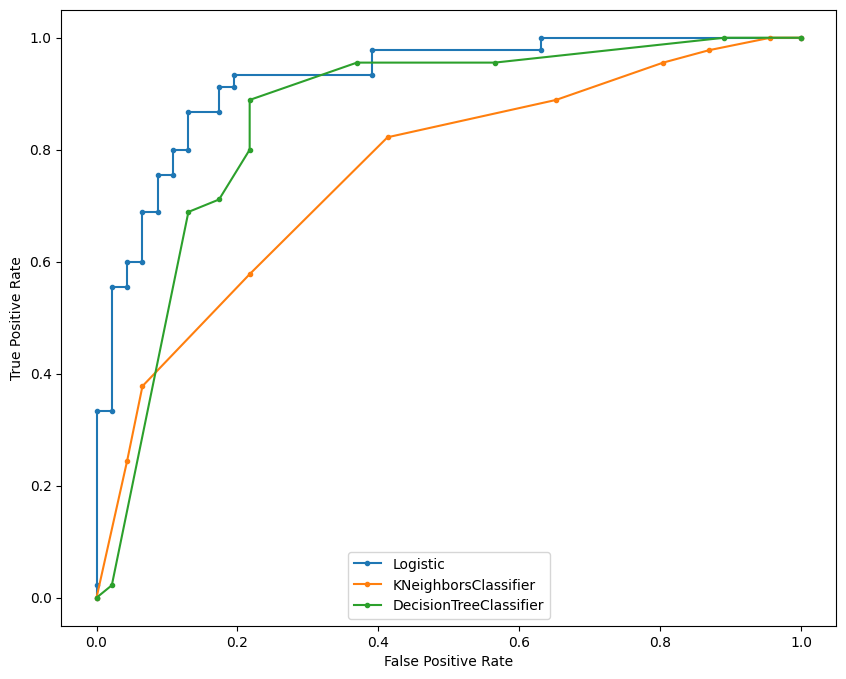

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
ax.plot(fpr_knn, tpr_knn, marker='.', label='KNeighborsClassifier')
ax.plot(fpr_dtc, tpr_dtc, marker='.', label='DecisionTreeClassifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=8)

plt.show()

**From the above Graph it can be clearly interpreted that the area under the Logistic curve is more than the other two curves and hence provides a better accuracy.**

In [36]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, prob_lr)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_dtc = roc_auc_score(y_test, prob_dtc)

print(f'Logistic : ROC AUC = {round(auc_lr, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_knn, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_dtc, 3)*100} %')

Logistic : ROC AUC = 92.5 %
Logistic : ROC AUC = 75.9 %
Logistic : ROC AUC = 85.7 %


The roc_auc_score can also be calculated using the above module.The roc_auc_score of LogisticRegression is 92.5% which is much greater than the other two.

In [38]:
#from pandas.core.window.expanding import ExpandingGroupby
#from matplotlib.projections.polar import ThetaAxis
#n = int(input("Enter no of Patients who's Status is to be Determined :- "))

#def Prediction() :
 # age = int(input("Age of the Patient :- "))
  #sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
  #cp = int(input("Chest Pain Type :- "))
  #trestbps = int(input("Resting Blood Pressure :- "))
  #chol = int(input("Serum Cholestrol :- "))
  #fbs = int(input("Fasting Blood Sugar :- "))
  #restecg = int(input("Resting ElectroCardiographic Result :- "))
  #thalach = int(input("Maximum Heart Rate Achieved :- "))
  #exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
  #oldpeak = float(input("ST Depression induced by Exercise relative to Rest :- "))
  #slope = int(input("Slope of Peak Exercise ST segment :- "))
  #ca = int(input("No. of Major Vessels (0-3) :- "))
  #thal = int(input("Thalasemia Indicator :- "))
  #new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

  #new_patient = new_patient.reshape(1,-1) #converting to 2D array

  #if clf_lr.predict(new_patient) == 0 :
   # return "The Patient with the above provided Vitals Dies!!!"
  #else :
   # return "The Patient with the above provided vitals Lives!!!"

#for i in range(n) :
 # print(Prediction())

Enter no of Patients who's Status is to be Determined :- 1
Age of the Patient :- 60
Sex of the Patient (0 - female & 1 - male) :- 1
Chest Pain Type :- 3
Resting Blood Pressure :- 142
Serum Cholestrol :- 230
Fasting Blood Sugar :- 1
Resting ElectroCardiographic Result :- 0
Maximum Heart Rate Achieved :- 145
Exercise-include angina (1 - True, 0 - False) :- 0
ST Depression induced by Exercise relative to Rest :- 2.2
Slope of Peak Exercise ST segment :- 0
No. of Major Vessels (0-3) :- 0
Thalasemia Indicator :- 1
The Patient with the above provided vitals Lives!!!


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**According to the above provided vitals taken from a random patient our model has predicted that the Patient Lives. The model can be used to check the status of any number of patients at a time which is time saving.**